In [2]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
from matplotlib import style

In [3]:
methods = pd.read_csv("methodData.csv")
modules = pd.read_csv("moduleData.csv")
teams = pd.read_csv("teamData.csv")
indAggResponses = pd.read_csv("indAggResponses.csv")
teamAggResponses = pd.read_csv("teamAggResponses.csv")

In [4]:
teamAggResponses.head()

,Unnamed: 0,Team,Module,Chosen Method,Reason,Decision Process
0,0,Team 1,1,1:1 Interview,Since our team is focusing on creating a produ...,Our team agreed to use the 1:1 Interview metho...
1,1,Team 1,1,Open Card Sorting,We decided to go with the open card sorting me...,"Initially, our team was choosing between close..."
2,2,Team 1,1,AEIOU,The AEIOU method will allow us to observe unde...,We decided that the AEIOU method would enable ...
3,3,Team 2,1,1:1 Interview,We are trying to improve the current medical p...,Since we all come from different background. E...
4,4,Team 2,1,Community Appraisal,Since we would like encourage a sense of commu...,There is a strong argument to be made about wh...


In [5]:
teamReasonsByModule = teamAggResponses.groupby(['Module', 'Chosen Method'])['Reason'].apply(lambda lst: ' '.join(lst)).to_frame()
teamReasonsByModule = teamReasonsByModule.reset_index()
teamReasonsByModule.head()

,Module,Chosen Method,Reason
0,1,1:1 Interview,Since our team is focusing on creating a produ...
1,1,AEIOU,The AEIOU method will allow us to observe unde...
2,1,Community Appraisal,Since we would like encourage a sense of commu...
3,1,Competitive Analysis,"Overall, the reason why competitive analysis w..."
4,1,Open Card Sorting,We decided to go with the open card sorting me...


In [6]:
# parse list representation of lists in teams to actual list
import ast
teams['SID'] = teams['SID'].apply(ast.literal_eval)

In [7]:
teams['key'] = 1
indAggResponseswTeams = pd.merge(indAggResponses, teams, on='key')
matchingStudTeams = [indAggResponseswTeams['SID_x'][i] in indAggResponseswTeams['SID_y'][i] 
                     for i in range(indAggResponseswTeams.shape[0])]
indAggResponseswTeams = indAggResponseswTeams[matchingStudTeams]
indAggResponseswTeams = indAggResponseswTeams.reset_index().drop(['index', 'Unnamed: 0_x', 
                                                                  'key', 'SID_y',
                                                                  'Unnamed: 0_y', 'Familiar'], axis=1)
indResp = indAggResponseswTeams
indResp.head()

,SID_x,Module #,Module,Method,MID,Selected,Reason,Team
0,S_0,1.0,Research,1:1 Interview,M_0,True,"I've never used this method, despite know abou...",Team 4
1,S_0,1.0,Research,AEIOU,M_1,False,Because in my routine as Product Manager and B...,Team 4
2,S_0,1.0,Research,Closed Card Sorting,M_2,False,Because in my routine as Product Manager and B...,Team 4
3,S_0,1.0,Research,Community Appraisal,M_3,False,"As a Product Manager and Business Manager, I b...",Team 4
4,S_0,1.0,Research,Competitive Analysis,M_4,False,"As a Product Manager and Business Manager, I b...",Team 4


# TF-IDF and Other Word Analysis

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, TfidfTransformer
v = TfidfVectorizer()
cvec2 = CountVectorizer(stop_words='english', min_df=1, max_df=.5, ngram_range=(1,2))

In [9]:
from itertools import islice
cvec2.fit(teamReasonsByModule.Reason)
list(islice(cvec2.vocabulary_.items(), 20))

[('needs make', 2375),
 ('clearly track', 525),
 ('require preliminary', 3020),
 ('markets', 2151),
 ('set categories', 3174),
 ('gathering linear', 1481),
 ('functional', 1444),
 ('module design', 2312),
 ('documentor', 1040),
 ('rank specific', 2915),
 ('berkeley map', 328),
 ('medical', 2172),
 ('physical', 2586),
 ('solution grounded', 3242),
 ('allows team', 154),
 ('pros outweighed', 2835),
 ('considered approach', 684),
 ('organizer', 2483),
 ('method allows', 2215),
 ('round robin', 3104)]

In [10]:
cvec3 = CountVectorizer(stop_words='english', min_df=1, max_df=.5, ngram_range=(1,3))
cvec3.fit(teamReasonsByModule.Reason)
list(islice(cvec3.vocabulary_.items(), 20))

[('heuristics good team', 2840),
 ('organizer', 4321),
 ('require preliminary', 5242),
 ('markets', 3727),
 ('social needs interview', 5601),
 ('base difficult secondary', 475),
 ('functional', 2489),
 ('issues product need', 3338),
 ('module design', 4027),
 ('kinds data', 3405),
 ('rank specific', 5071),
 ('observation users', 4197),
 ('medical', 3760),
 ('physical', 4492),
 ('solution grounded', 5610),
 ('allows team', 260),
 ('considered approach', 1176),
 ('medicine using phone', 3777),
 ('shows', 5530),
 ('international students aspects', 3256)]

In [11]:
cvec_counts = cvec2.transform(teamReasonsByModule.Reason)
print('sparse matrix shape:', cvec_counts.shape)
print('nonzero count:', cvec_counts.nnz)
print('sparsity: %.2f%%' % (100.0 * cvec_counts.nnz / (cvec_counts.shape[0] * cvec_counts.shape[1])))

sparse matrix shape: (43, 3961)
nonzero count: 5303
sparsity: 3.11%


In [12]:
occ = np.asarray(cvec_counts.sum(axis=0)).ravel().tolist()
counts_df = pd.DataFrame({'term': cvec2.get_feature_names(), 'occurrences': occ})
counts_df.sort_values(by='occurrences', ascending=False).head(20)

,occurrences,term
2728,48,process
2764,43,product
900,42,design
3450,40,team
1680,37,ideas
3694,28,user
3711,25,users
3532,23,time
2268,23,methods
3738,22,using


In [13]:
transformer = TfidfTransformer()
transformed_weights = transformer.fit_transform(cvec_counts)
transformed_weights

<43x3961 sparse matrix of type '<class 'numpy.float64'>'
	with 5303 stored elements in Compressed Sparse Row format>

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
tvec = TfidfVectorizer(min_df=.0025, max_df=.1, stop_words='english', ngram_range=(1,2))
tvec_weights = tvec.fit_transform(teamReasonsByModule.Reason.dropna())
weights = np.asarray(tvec_weights.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term': tvec.get_feature_names(), 'weight': weights})
responseWeights = weights_df.sort_values(by='weight', ascending=False).reset_index().drop('index', 1)#.head(40)
responseWeights.head(40)

,term,weight
0,feedback,0.015844
1,round,0.013891
2,helps,0.013377
3,prototype,0.013044
4,generate,0.011442
5,app,0.011330
6,sorting,0.011264
7,community,0.011229
8,character,0.011017
9,matrix,0.010779


In [15]:
teamReasonsByModule#.Reason

,Module,Chosen Method,Reason
0,1,1:1 Interview,Since our team is focusing on creating a produ...
1,1,AEIOU,The AEIOU method will allow us to observe unde...
2,1,Community Appraisal,Since we would like encourage a sense of commu...
3,1,Competitive Analysis,"Overall, the reason why competitive analysis w..."
4,1,Open Card Sorting,We decided to go with the open card sorting me...
5,1,Usability Testing,Our problems requires that two sets of user wi...
6,1,User Observation,As we're trying to get information on BART rid...
7,2,2x2 Matrix,2x2 Matrix can provide a clear view of the cur...
8,2,Affinity Diagramming,"After out 1:1 interviews, our team had a lot o..."
9,2,Atomize,Atomization seems like a natural extension of ...


## tf-idf on aggregated responses

In [16]:
#selMethodsI = indResp[indResp.Selected == "True"]
tvec_weights = tvec.fit_transform(teamAggResponses.Reason.dropna())
weights = np.asarray(tvec_weights.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term': tvec.get_feature_names(), 'weight': weights})
aggWts = weights_df.sort_values(by='weight', ascending=False).reset_index().drop(["index"], axis=1)
aggWts.head(30)

,term,weight
0,feedback,0.016103
1,ideation,0.013700
2,round,0.013606
3,ideation process,0.012983
4,brainstorming,0.012857
5,weighted,0.012140
6,experience,0.011800
7,main,0.011667
8,matrix,0.011095
9,interviews,0.011093


## tf-idf on indidivual methods chosen and not chosen

In [17]:
selMethodsI = indResp[indResp.Selected == "True"]
tvec_weights = tvec.fit_transform(selMethodsI.Reason.dropna())
weights = np.asarray(tvec_weights.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term': tvec.get_feature_names(), 'weight': weights})
selWts = weights_df.sort_values(by='weight', ascending=False).reset_index().drop(["index"], axis=1)
selWts.head(30)

,term,weight
0,good,0.019121
1,great,0.018098
2,group,0.016984
3,helps,0.016359
4,allows,0.016274
5,time,0.016237
6,different,0.016056
7,information,0.016025
8,need,0.014769
9,understand,0.014731


Standout words: "time", "different", "quickly", "effective", "use", "need"

In [18]:
notselMethodsI = indResp[indResp.Selected == "False"]
tvec_weights = tvec.fit_transform(notselMethodsI.Reason.dropna())
weights = np.asarray(tvec_weights.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term': tvec.get_feature_names(), 'weight': weights})
notselWts = weights_df.sort_values(by='weight', ascending=False).reset_index().drop(["index"], axis=1)
notselWts.head(50)

,term,weight
0,ideas,0.021916
1,don,0.020053
2,group,0.017736
3,like,0.016906
4,choose,0.016724
5,project,0.016229
6,used,0.016079
7,team,0.016039
8,need,0.015614
9,problem,0.014753


Standout words: "time consuming", "limited", "difficult"

### Intersection

In [21]:
intersect = pd.merge(selWts, notselWts, on="term")
intersect.columns = ["term", "Sel Weight", "Not Sel Weight"]
intersect["Sel Weight - Not Sel Weight"] = intersect.apply(lambda row: row["Sel Weight"] - row["Not Sel Weight"], axis = 1)
intersect = intersect.sort_values("Sel Weight - Not Sel Weight", ascending = False).reset_index().drop("index", 1)
intersect.head(50)

,term,Sel Weight,Not Sel Weight,Sel Weight - Not Sel Weight
0,helps,0.016359,0.002647,0.013711
1,allows,0.016274,0.004163,0.012111
2,improve,0.010960,0.002610,0.008350
3,great,0.018098,0.010267,0.007831
4,understand,0.014731,0.007713,0.007018
5,method help,0.008609,0.001688,0.006920
6,identify,0.008352,0.001730,0.006622
7,different,0.016056,0.009506,0.006549
8,going,0.008530,0.002101,0.006429
9,tool,0.009120,0.002704,0.006415


In [22]:
intersectInv = pd.merge(selWts, notselWts, on="term")
intersectInv.columns = ["term", "Sel Weight", "Not Sel Weight"]
intersectInv["Not Sel Weight - Sel Weight"] = intersectInv.apply(lambda row: row["Not Sel Weight"] - row["Sel Weight"], axis = 1)
intersectInv = intersectInv.sort_values("Not Sel Weight - Sel Weight", ascending = False).reset_index().drop("index", 1)
intersectInv.head(50)

,term,Sel Weight,Not Sel Weight,Not Sel Weight - Sel Weight
0,don,0.002983,0.020053,0.017071
1,choose,0.005515,0.016724,0.011209
2,difficult,0.001301,0.010357,0.009057
3,similar,0.003758,0.012096,0.008338
4,requires,0.002642,0.010653,0.008011
5,just,0.003550,0.010685,0.007136
6,did,0.004077,0.011140,0.007063
7,limited,0.004871,0.011420,0.006549
8,hard,0.001873,0.008312,0.006439
9,project,0.010452,0.016229,0.005777


## Run tf-idf on Modules


### Research

In [19]:
resSelMethodsI = indResp[(indResp.Module == "Research") & (indResp.Selected == "True")]
tvec_weights = tvec.fit_transform(resSelMethodsI.Reason.dropna())
weights = np.asarray(tvec_weights.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term': tvec.get_feature_names(), 'weight': weights})
weights_df.sort_values(by='weight', ascending=False).reset_index().drop(["index"], axis=1).head(50)

,term,weight
0,products,0.016173
1,people,0.016144
2,helps,0.015096
3,like,0.014960
4,need,0.014819
5,identify,0.014770
6,know,0.014465
7,market,0.013765
8,good,0.013615
9,easily,0.013504


In [20]:
resNSelMethodsI = indResp[(indResp.Module == "Research") & (indResp.Selected == "False")]
tvec_weights = tvec.fit_transform(resNSelMethodsI.Reason.dropna())
weights = np.asarray(tvec_weights.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term': tvec.get_feature_names(), 'weight': weights})
weights_df.sort_values(by='weight', ascending=False).reset_index().drop(["index"], axis=1).head(50)

,term,weight
0,manager,0.021322
1,group,0.019291
2,aeiou,0.018327
3,focus,0.017142
4,don,0.015125
5,think,0.014592
6,limited,0.014176
7,user,0.013421
8,focus group,0.013024
9,methods,0.013009


### Analysis

In [21]:
analSelMethodsI = indResp[(indResp.Module == "Analysis") & (indResp.Selected == "True")]
tvec_weights = tvec.fit_transform(analSelMethodsI.Reason.dropna())
weights = np.asarray(tvec_weights.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term': tvec.get_feature_names(), 'weight': weights})
weights_df.sort_values(by='weight', ascending=False).reset_index().head(50)

,index,term,weight
0,1084,ideas,0.014839
1,1208,interview,0.013737
2,1745,problem,0.013395
3,1364,map,0.013384
4,2226,thinking,0.012361
5,1577,organize,0.012214
6,1505,need,0.011757
7,1038,helps,0.011308
8,1803,project,0.011199
9,53,allow,0.011164


In [22]:
analNSelMethodsI = indResp[(indResp.Module == "Analysis") & (indResp.Selected == "False")]
tvec_weights = tvec.fit_transform(analNSelMethodsI.Reason.dropna())
weights = np.asarray(tvec_weights.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term': tvec.get_feature_names(), 'weight': weights})
weights_df.sort_values(by='weight', ascending=False).reset_index().head(50)

,index,term,weight
0,3391,problem,0.013577
1,2946,need,0.013160
2,4377,time consuming,0.013145
3,848,consuming,0.013145
4,1813,good,0.012640
5,135,analysis,0.012575
6,1213,difficult,0.012376
7,999,data,0.012275
8,576,choose,0.011722
9,3457,product,0.011383


# tf-idf on 

# Graphs

In [24]:
teamMethods = teamAggResponses.drop(['Unnamed: 0', 'Decision Process'], axis=1)
teamMethods.head()

,Team,Module,Chosen Method,Reason
0,Team 1,1,1:1 Interview,Since our team is focusing on creating a produ...
1,Team 1,1,Open Card Sorting,We decided to go with the open card sorting me...
2,Team 1,1,AEIOU,The AEIOU method will allow us to observe unde...
3,Team 2,1,1:1 Interview,We are trying to improve the current medical p...
4,Team 2,1,Community Appraisal,Since we would like encourage a sense of commu...


In [25]:
# Group responses by module
#indResp.groupby(['Module #', 'Method']).describe()
modMethodsI = indResp[indResp['Selected'] == 'True'].groupby(['Module #', 'Method']).describe()
modMethodsI = modMethodsI.reset_index()[['Module #', 'Method', 'Module']]
#modMethodsI.columns = modMethodsI.columns.droplevel()
modMethodsI.head()

Module #                Method Module                      
                                  count unique       top freq
0      1.0         1:1 Interview      4      1  Research    4
1      1.0                 AEIOU     12      1  Research   12
2      1.0   Closed Card Sorting      5      1  Research    5
3      1.0   Community Appraisal      3      1  Research    3
4      1.0  Competitive Analysis     12      1  Research   12

In [26]:
# Visualization tools
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]

In [27]:
methodsbyT = teamAggResponses.groupby(['Module', 'Chosen Method']).describe().reset_index().iloc[:, [0, 1, 2]]
methodsbyT.columns = ['Module #', 'Method', 'count']
methodsbyT.head()

,Module #,Method,count
0,1,1:1 Interview,6.0
1,1,AEIOU,5.0
2,1,Community Appraisal,1.0
3,1,Competitive Analysis,2.0
4,1,Open Card Sorting,1.0


# Aggregated Method Selection by Module

## Frequency Plots

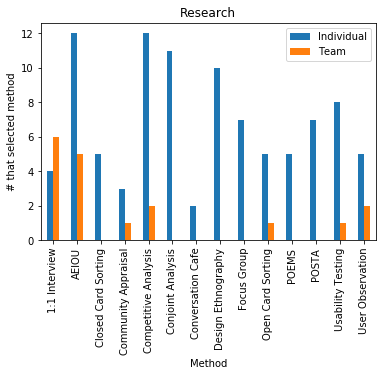

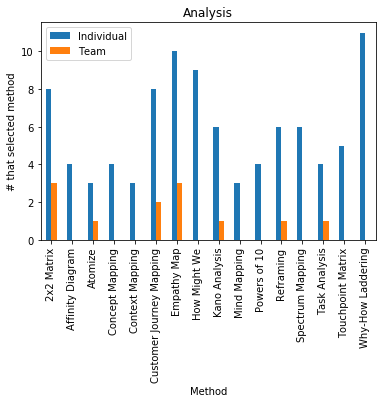

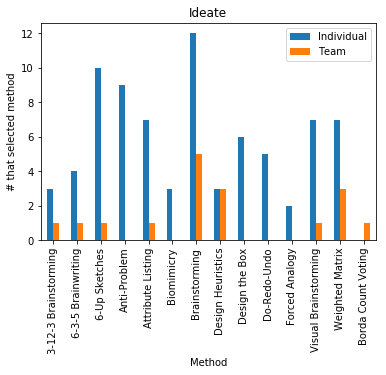

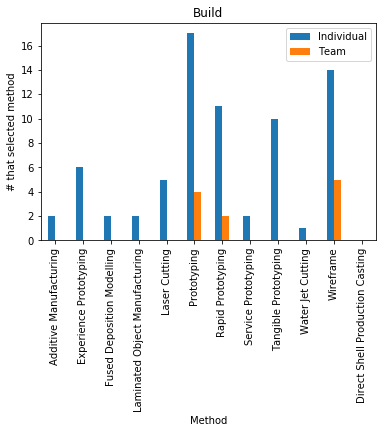

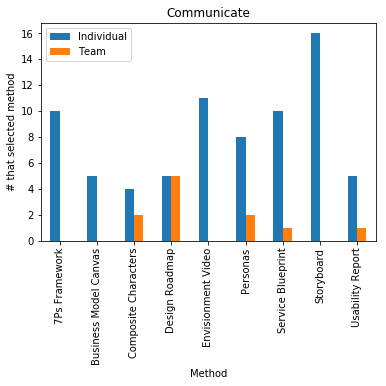

In [28]:

for m in range(1,5+1):
    selMethods = modMethodsI[modMethodsI['Module #'] == m]
    selMethods.columns = ["Module #", "Method", "count", "unique", "Module", "freq"]#selMethods.columns.droplevel()
    selMethods = selMethods.reset_index().drop("index", 1)
    selMethodsT = methodsbyT[methodsbyT["Module #"] == m].reset_index().drop("index", 1)
    #selMethods = selMethods.drop(['count'], axis=1)
    
    for method in methods[methods["Module #"] == m]["Method"]:
        if method not in selMethods["Method"].values:
            i = selMethods.shape[0]
            selMethods.loc[i] = [m, method, 0, 0, 0, 0]
        if method not in selMethodsT["Method"].values:
            i = selMethodsT.shape[0]
            selMethodsT.loc[i] = [m, method, 0]
    
    #selMethods[['Method', 'count']].plot(kind='bar', x='Method', legend=None)
    #selMethodsT[['Method', 'count']].plot(kind='bar', x='Method', legend=None)
    mergedTable = pd.merge(selMethods, selMethodsT, on="Method")[['Method', 'count_x', 'count_y']]
    mergedTable.columns = ['Method', 'Individual', 'Team']
    
    mergedTable.plot(kind='bar', x='Method', legend=["Individual", "Team"])
    plt.ylabel('# that selected method')
    plt.title(selMethods['Module'][0])
    plt.show()

## Distributions

In [29]:
selMethods = modMethodsI[modMethodsI['Module #'] == 1]
selMethods.columns = ["Module #", "Method", "count", "unique", "Module", "freq"]#selMethods.columns.droplevel()
selMethods = selMethods.reset_index()
totalSel = selMethods["freq"].sum()
selMethods = selMethods.assign(Proportion=selMethods["freq"].apply(lambda x: x/totalSel))
selMethods

,index,Module #,Method,count,unique,Module,freq,Proportion
0,0,1.0,1:1 Interview,4,1,Research,4,0.041667
1,1,1.0,AEIOU,12,1,Research,12,0.125000
2,2,1.0,Closed Card Sorting,5,1,Research,5,0.052083
3,3,1.0,Community Appraisal,3,1,Research,3,0.031250
4,4,1.0,Competitive Analysis,12,1,Research,12,0.125000
5,5,1.0,Conjoint Analysis,11,1,Research,11,0.114583
6,6,1.0,Conversation Cafe,2,1,Research,2,0.020833
7,7,1.0,Design Ethnography,10,1,Research,10,0.104167
8,8,1.0,Focus Group,7,1,Research,7,0.072917
9,9,1.0,Open Card Sorting,5,1,Research,5,0.052083


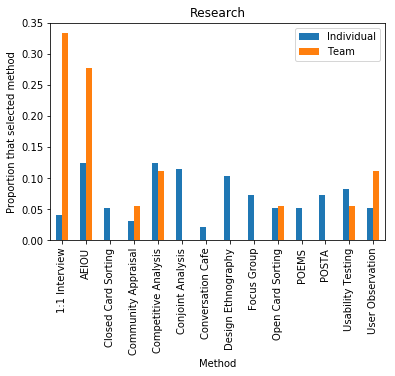

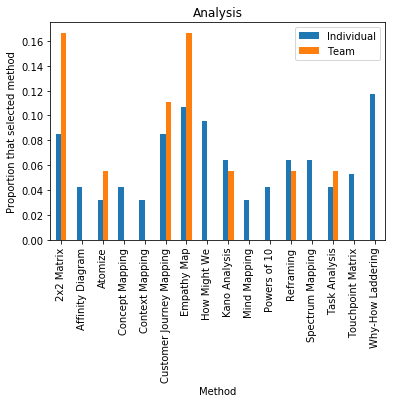

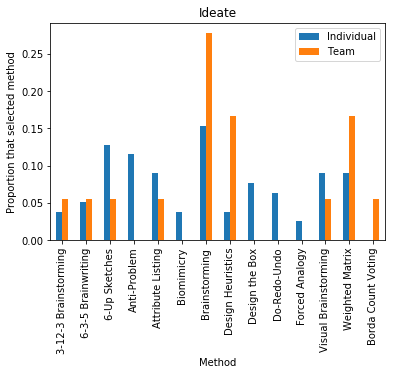

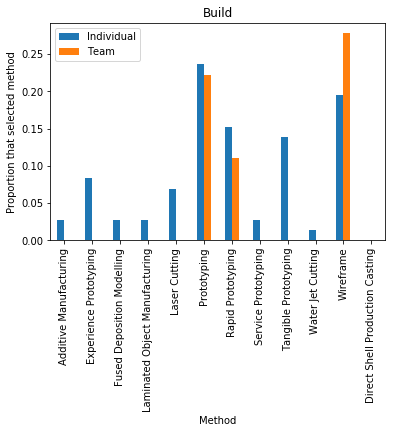

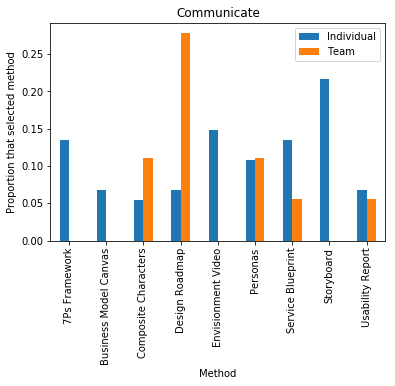

In [30]:
def methodDistsByMod(m):
    # Returns table containing proportion of individuals and teams selecting certain methods in a certain module

    selMethods = modMethodsI[modMethodsI['Module #'] == m]
    selMethods.columns = ["Module #", "Method", "count", "unique", "Module", "freq"]
    selMethods = selMethods.reset_index().drop("index", 1)
    totalSel = selMethods["freq"].sum()
    selMethods = selMethods.assign(ProportionI=selMethods["freq"].apply(lambda x: x/totalSel))

    selMethodsT = methodsbyT[methodsbyT["Module #"] == m].reset_index().drop("index", 1)
    totalSelT = selMethodsT["count"].sum()
    selMethodsT = selMethodsT.assign(ProportionT=selMethodsT["count"].apply(lambda x: x/totalSelT))

    for method in methods[methods["Module #"] == m]["Method"]:
        if method not in selMethods["Method"].values:
            i = selMethods.shape[0]
            selMethods.loc[i] = [m, method, 0, 0, 0, 0, 0]
        if method not in selMethodsT["Method"].values:
            i = selMethodsT.shape[0]
            selMethodsT.loc[i] = [m, method, 0, 0]

    mergedTable = pd.merge(selMethods, selMethodsT, on="Method")[['Method', 'ProportionI', 'ProportionT']]
    mergedTable.columns = ['Method', 'Individual', 'Team']
    return mergedTable

for m in range(1,5+1):
    mergedTable = methodDistsByMod(m)
    mergedTable.plot(kind='bar', x='Method', legend=["Individual", "Team"])
    plt.ylabel('Proportion that selected method')
    plt.title(modules['Module'][m-1])
    plt.show()

## Could the differences in distributions of method selection between individuals and teams be due to chance?

### Statistic = Total Variation Distance

In [31]:
numTeams = 6
methodsPerTeam = 3
numMethods = numTeams * methodsPerTeam

In [32]:
def abTestModule(m, reps):
    mergedTable = methodDistsByMod(m)
    
    obsTVD = mergedTable.apply(lambda row: abs(row.Individual - row.Team), axis = 1).sum()
    
    tvds = []
    for _ in range(reps):
        sample = np.array([])
        for _ in range(numTeams):
            teamSel = np.random.choice(mergedTable.Method, methodsPerTeam, p=mergedTable.Individual, replace=False)
            sample = np.append(sample, teamSel)

        empSel = mergedTable.assign(EmpProp = [sum(sample == method)/numMethods for method in mergedTable.Method.values])
        tvd = empSel.apply(lambda row: abs(row.Individual - row.EmpProp), axis = 1).sum()
        tvds.append(tvd)
    
    return (tvds > obsTVD).sum() / reps

In [33]:
[abTestModule(m, 1000) for m in range(1, 5+1)]

[0.0, 0.255, 0.010999999999999999, 0.23000000000000001, 0.0]

### How likely is it for the difference in proportions between individual methods to be due to chance?

In [34]:
def probSelTModule(method, m, reps):
    # Returns probability that a method was selected more (or less) times from the 
    # individual method selection distribution than it actually was by the teams
    mergedTable = methodDistsByMod(m)
    
    obsProp = mergedTable[mergedTable.Method == method].Team.values[0]
    
    props = []
    for _ in range(reps):
        sample = np.array([])
        for _ in range(numTeams):
            teamSel = np.random.choice(mergedTable.Method, methodsPerTeam, p=mergedTable.Individual, replace=False)
            sample = np.append(sample, teamSel)

        empSel = mergedTable.assign(EmpProp = [sum(sample == method)/numMethods for method in mergedTable.Method.values])
        prop = empSel[empSel.Method == method].EmpProp.values[0]
        props.append(prop)
    
        
    obsIndProp = mergedTable[mergedTable.Method == method].Individual.values[0]
    
    if obsProp > obsIndProp:
        return (props > obsProp).sum() / reps
    else:
        return (props < obsProp).sum() / reps

In [35]:
probSelTModule("1:1 Interview", 1, 1000)

0.0

In [36]:
probSelTModule("AEIOU", 1, 1000)

0.002

In [37]:
probSelTModule("User Observation", 1, 1000)

0.068000000000000005

In [38]:
probSelTModule("2x2 Matrix", 2, 1000)

0.042000000000000003

In [39]:
probSelTModule("Empathy Map", 2, 1000)

0.060999999999999999

In [40]:
probSelTModule("Brainstorming", 3, 1000)

0.0040000000000000001

In [41]:
probSelTModule("Design Heuristics", 3, 1000)

0.0040000000000000001

In [42]:
probSelTModule("Design Roadmap", 5, 1000)

0.0